# Pandas - Basics

This tutorial is based on the open-source [notebooks](https://github.com/manujeevanprakash/Pandas-basics) of Manu Jeevan Prakash.

Pandas contains high level data structures and manipulation tools to make data analysis fast and easy in Python.

In [1]:
import pandas as pd

# Series and DataFrame are data structures:
from pandas import Series, DataFrame

### Series

Series is a one-dimensional array object of any Numpy data-type.
A series is represented by an **index** (on the left) and values (on the right).

In [2]:
s = Series([5,4,3,2,1])  # Similar to numpy definition.
print(s)

0    5
1    4
2    3
3    2
4    1
dtype: int64


In [3]:
print(s.index)  # ".index" method returns the position of data in the series.
print(s.values)  # Similar to dictionary, ".values" method returns the data in the series.

RangeIndex(start=0, stop=5, step=1)
[5 4 3 2 1]


In [4]:
v = [5, 4, 3, 2, 1, -7, -29]
i = ['a', 'b', 'c', 'd', 'e', 'f', 'h']

# The index can also be specified:
letters = Series(v, index=i)

print(letters)
print(letters.index)
print(letters.values)

a     5
b     4
c     3
d     2
e     1
f    -7
h   -29
dtype: int64
Index(['a', 'b', 'c', 'd', 'e', 'f', 'h'], dtype='object')
[  5   4   3   2   1  -7 -29]


In [5]:
print(letters['a'])  # Selects a value from the Series with the index.
letters['d'] = 9  # Updates the value of "d" in the series.
print(letters)

# Select a group of values:
g = ['c', 'e', 'h']
print(letters[g])

5
a     5
b     4
c     3
d     9
e     1
f    -7
h   -29
dtype: int64
c     3
e     1
h   -29
dtype: int64


In [6]:
letters_mask = letters > 0
print(letters[letters_mask])  # Returns only the positive values.
print(letters * 2)  # Multiplies each element of the series.

a    5
b    4
c    3
d    9
e    1
dtype: int64
a    10
b     8
c     6
d    18
e     2
f   -14
h   -58
dtype: int64


You can also apply numpy functions to Series.

In [7]:
import numpy as np

np.mean(letters)

-2.0

You can check whether an index is present in the series.

In [8]:
print('b' in letters)
print('z' in letters)

True
False


We can also convert dictionaries into series:

In [9]:
player_salary = {'Rooney': 5000, 'Messi': 7500, 'Ronaldo': 8500, 'Fabregas':4000, 'Van persie': 6700} 

new_player = Series(player_salary)

print(new_player)

Rooney        5000
Messi         7500
Ronaldo       8500
Fabregas      4000
Van persie    6700
dtype: int64


If you change the index of the series, new indices will get `NaN` as their value.

In [10]:
players = ['Klose', 'Messi', 'Ronaldo', 'Van persie', 'Ballack']

player_1 = Series(player_salary, index= players)

print(player_1)

Klose            NaN
Messi         7500.0
Ronaldo       8500.0
Van persie    6700.0
Ballack          NaN
dtype: float64


`pd.isnull()` searches for null values in the data object.

In [11]:
pd.isnull(player_1)

Klose          True
Messi         False
Ronaldo       False
Van persie    False
Ballack        True
dtype: bool

We can also search for non null values. Remarcable!

In [12]:
pd.notnull(player_1)

Klose         False
Messi          True
Ronaldo        True
Van persie     True
Ballack       False
dtype: bool

It is also convenient to assign a name to the index and to the values.

In [13]:
player_1.name = 'Bundesliga players'  # Name for the values.
player_1.index.name = 'Player names'  # Name for the index.

print(player_1)

Player names
Klose            NaN
Messi         7500.0
Ronaldo       8500.0
Van persie    6700.0
Ballack          NaN
Name: Bundesliga players, dtype: float64


### Data Frame

Data frames have a structure similar to a spread sheet. They contain ordered rows and columns, and each column can have a different data type. Data frames have both, row and column indices.

We can also convert dictionaries into data frames.

In [14]:
states = {'State': ['Gujarat', 'Tamil Nadu', ' Andhra', 'Karnataka', 'Kerala'],
          'Population': [36, 44, 67, 89, 34],
          'Language': ['Gujarati', 'Tamil', 'Telugu', 'Kannada', 'Malayalam']}

states_df = DataFrame(states)

states_df

,State,Population,Language
0,Gujarat,36,Gujarati
1,Tamil Nadu,44,Tamil
2,Andhra,67,Telugu
3,Karnataka,89,Kannada
4,Kerala,34,Malayalam


Let's change the order of the columns index.

In [15]:
states_df = DataFrame(states, columns=['State', 'Population', 'Language'], index =['a', 'b', 'c', 'd', 'e'])

states_df

,State,Population,Language
a,Gujarat,36,Gujarati
b,Tamil Nadu,44,Tamil
c,Andhra,67,Telugu
d,Karnataka,89,Kannada
e,Kerala,34,Malayalam


If we create new columns, the frame will get `NaN` values.

In [16]:
new_frame = DataFrame(states_df,
                      columns=['Population', 'Language', 'State', 'Per Capita Income'])

new_frame

,Population,Language,State,Per Capita Income
a,36,Gujarati,Gujarat,NaN
b,44,Tamil,Tamil Nadu,NaN
c,67,Telugu,Andhra,NaN
d,89,Kannada,Karnataka,NaN
e,34,Malayalam,Kerala,NaN


We can also retrieve data like in dictionaries.

In [17]:
print(new_frame.columns)
print(new_frame['State'])

Index(['Population', 'Language', 'State', 'Per Capita Income'], dtype='object')
a       Gujarat
b    Tamil Nadu
c        Andhra
d     Karnataka
e        Kerala
Name: State, dtype: object


Or by calling the object property.

In [18]:
new_frame.State

a       Gujarat
b    Tamil Nadu
c        Andhra
d     Karnataka
e        Kerala
Name: State, dtype: object

Rows can be retrieved using the `.iloc` function.

In [19]:
new_frame.iloc[3]

Population                  89
Language               Kannada
State                Karnataka
Per Capita Income          NaN
Name: d, dtype: object

We can assign the same value to the empty column.

In [20]:
new_frame['Per Capita Income'] = 99

new_frame

,Population,Language,State,Per Capita Income
a,36,Gujarati,Gujarat,99
b,44,Tamil,Tamil Nadu,99
c,67,Telugu,Andhra,99
d,89,Kannada,Karnataka,99
e,34,Malayalam,Kerala,99


Or a list of specific values.

In [21]:
new_frame['Per Capita Income'] = np.arange(5)

new_frame

,Population,Language,State,Per Capita Income
a,36,Gujarati,Gujarat,0
b,44,Tamil,Tamil Nadu,1
c,67,Telugu,Andhra,2
d,89,Kannada,Karnataka,3
e,34,Malayalam,Kerala,4


When assigning a list values to a column, the list lenght should match the length of the `DataFrame`.

In [22]:
s = Series([44, 33, 22], index=[1, 2, 3])

new_frame['Per Capita Income'] = s

new_frame

,Population,Language,State,Per Capita Income
a,36,Gujarati,Gujarat,NaN
b,44,Tamil,Tamil Nadu,NaN
c,67,Telugu,Andhra,NaN
d,89,Kannada,Karnataka,NaN
e,34,Malayalam,Kerala,NaN


In [23]:
guarat_mask = new_frame.State == 'Gujarat'

new_frame['Development'] = guarat_mask

new_frame

,Population,Language,State,Per Capita Income,Development
a,36,Gujarati,Gujarat,NaN,True
b,44,Tamil,Tamil Nadu,NaN,False
c,67,Telugu,Andhra,NaN,False
d,89,Kannada,Karnataka,NaN,False
e,34,Malayalam,Kerala,NaN,False


We can delete columns with the command `del`.

In [24]:
del new_frame['Development']

new_frame

,Population,Language,State,Per Capita Income
a,36,Gujarati,Gujarat,NaN
b,44,Tamil,Tamil Nadu,NaN
c,67,Telugu,Andhra,NaN
d,89,Kannada,Karnataka,NaN
e,34,Malayalam,Kerala,NaN


When we use nested dictionaries to create a DataFrame, the outer dictionary keys are columns and inner dictionary keys are rows.

In [25]:
data = {'Modi': {2010: 72,
                 2012: 78,
                 2014: 98},
        'Rahul': {2010: 55,
                  2012: 34,
                  2014: 22}}

elections = DataFrame(data) 

elections

,Modi,Rahul
2010,72,55
2012,78,34
2014,98,22


You can also transpose DataFrames.

In [26]:
elections.T

,2010,2012,2014
Modi,72,78,98
Rahul,55,34,22


In [27]:
dic = {'Gujarat':elections['Modi'][:-1],
       'India': elections['Rahul'][:2]}
df = DataFrame(dic)

df

,Gujarat,India
2010,72,55
2012,78,34


These are all the methods for creating data frames:

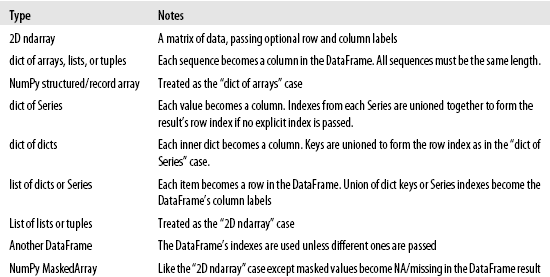

In [28]:
from IPython.display import Image

Image(filename='constructors.png')

The columns index and the rows index can have a name on their own.

In [29]:
df.index.name = 'Year'
df.columns.name = 'Region'

df

Region,Gujarat,India
Year,,
2010,72,55
2012,78,34


In [30]:
s = Series([5, 4, 3, 2, 1, -7, -29], index =['a', 'b', 'c', 'd', 'e', 'f', 'h'])
i = s.index

print(i)
print(i[1:4])

Index(['a', 'b', 'c', 'd', 'e', 'f', 'h'], dtype='object')
Index(['b', 'c', 'd'], dtype='object')


You cannot modify an index element, this will generate an error.
In other words, they are immutable.

In [31]:
#i[1] = 'f'

Check if a given year is in an index:

In [32]:
print(df)
print('\n2013 in df.index:', 2013 in df.index)

Region  Gujarat  India
Year                  
2010         72     55
2012         78     34

2013 in df.index: False


# Reindex

With `reindex` we can change the indices of an existing data frame. When we update the index, the values of the source index remain together in the new array. You can find the complete Pandas documentation in this [website](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html).

In [33]:
foo = Series(['Python', 'Java', 'c', 'c++', 'Php'], index =[5, 4, 3, 2, 1])
print(foo)

bar = foo.reindex([1, 2, 3, 4, 5])  # reindex() creates a new object.
print(bar)

5    Python
4      Java
3         c
2       c++
1       Php
dtype: object
1       Php
2       c++
3         c
4      Java
5    Python
dtype: object


In [34]:
# Introduce new indices with NaN values:
bar.reindex([2, 4, 6, 8, 10])

2      c++
4     Java
6      NaN
8      NaN
10     NaN
dtype: object

You can use the argument `fill_value` to replace the `NaN` values.

In [35]:
bar.reindex([2, 4, 6, 8, 10], fill_value=99)

2      c++
4     Java
6       99
8       99
10      99
dtype: object

You can use `ffill` or `bfill` to forward-fill or backward-fill missing values in the data.

In [36]:
s = Series(['Dhoni', 'Sachin', 'Kohli'], index =[0,2,4])
print(s)

0     Dhoni
2    Sachin
4     Kohli
dtype: object


In [37]:
s.reindex(range(6), method ='ffill')

0     Dhoni
1     Dhoni
2    Sachin
3    Sachin
4     Kohli
5     Kohli
dtype: object

In [38]:
s.reindex(range(6), method ='bfill')

0     Dhoni
1    Sachin
2    Sachin
3     Kohli
4     Kohli
5       NaN
dtype: object

We can also create data frames from Numpy arrays.

In [39]:
import numpy as np

np_arr = np.arange(9).reshape((3,3))
print(np_arr)

pd_df = DataFrame(np_arr,
                  index=['a', 'b', 'c'],
                  columns=['Gujarat', 'Tamil Nadu', 'Kerala'])

pd_df

[[0 1 2]
 [3 4 5]
 [6 7 8]]


,Gujarat,Tamil Nadu,Kerala
a,0,1,2
b,3,4,5
c,6,7,8


Other re-indexing arguments:

* `limit` Specify the maximum gap size to fill when forward- or backward-filling.
* `level` Specify the level of the new index to be assigned.
* `copy` Do not copy the data if the new index is equivalent to the old index. True by default (i.e. always copy data).

# Dropping entries from an axis

With the `drop` you can remove data. It returns a new object with the values deleted.

In [40]:
s = Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

s.drop(['a', 'b'])

a    0
b    1
c    2
d    3
e    4
dtype: int64


c    2
d    3
e    4
dtype: int64

In [41]:
# Original:
states_df

,State,Population,Language
a,Gujarat,36,Gujarati
b,Tamil Nadu,44,Tamil
c,Andhra,67,Telugu
d,Karnataka,89,Kannada
e,Kerala,34,Malayalam


In [42]:
# Drop ROWS:
states_df.drop(['b', 'd'])

,State,Population,Language
a,Gujarat,36,Gujarati
c,Andhra,67,Telugu
e,Kerala,34,Malayalam


In [43]:
# Drop COLUMNS:
states_df.drop(['State', 'Population'], axis=1)

,Language
a,Gujarati
b,Tamil
c,Telugu
d,Kannada
e,Malayalam


### Selecting, Indexing and Filtering

In [44]:
s = Series(['Python', 'Java', 'c', 'c++', 'Php'], index=[5, 4, 3, 2, 1])
print(s)

5    Python
4      Java
3         c
2       c++
1       Php
dtype: object


In [45]:
print(s[5])

Python


In [46]:
print(s[2:4])

3      c
2    c++
dtype: object


In [47]:
print(s[[1, 2, 3, 2]])

1    Php
2    c++
3      c
2    c++
dtype: object


In [48]:
php_mask = s == 'Php'

print(s[php_mask])

1    Php
dtype: object


We retrieve data from a DataFrame in the same way as with Series.

In [49]:
states_df[['Population', 'Language']]

,Population,Language
a,36,Gujarati
b,44,Tamil
c,67,Telugu
d,89,Kannada
e,34,Malayalam


In [50]:
# Select the data with 'Population' greater than 50:
states_df[states_df['Population'] > 50]

,State,Population,Language
c,Andhra,67,Telugu
d,Karnataka,89,Kannada


In [51]:
# Select the first three rows:
states_df[:3]

,State,Population,Language
a,Gujarat,36,Gujarati
b,Tamil Nadu,44,Tamil
c,Andhra,67,Telugu


Select a subset of rows **and** columns:

In [52]:
states_df.loc[['a', 'b'], ['State', 'Language']]

,State,Language
a,Gujarat,Gujarati
b,Tamil Nadu,Tamil


As a final excercise, replicate the examples in the Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) for creating and reading Excel files.

* Create a `DataFrame`.
* Save the data as an Excel file.
* Load the data from the excel file.

You can also find out how to process [`CSV`](https://en.wikipedia.org/wiki/Comma-separated_values) files in the following [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).